In [85]:
from skimage import data
import cv2

cat = data.chelsea()

In [86]:
cat = cv2.cvtColor(cat,cv2.COLOR_RGB2GRAY)

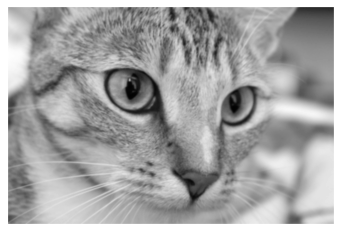

In [87]:
from matplotlib import pyplot as plt
plt.imshow(cat, cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [88]:
cat.dtype

dtype('uint8')

In [89]:
import numpy as np

cat_f = np.float32(cat)/255.0

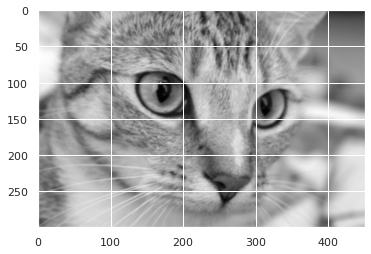

In [90]:
plt.imshow(cat, cmap='gray', interpolation='bicubic')


In [91]:
dst = cv2.dct(cat_f)
print(dst.shape)

(300, 451)


300
480
(300, 480)


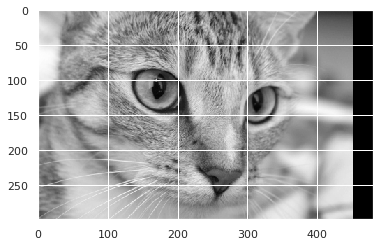

In [92]:
plt.imshow(dst, cmap='gray', interpolation='bicubic')

def getOptimalDCTSize(N):
    return 2*cv2.getOptimalDFTSize(int((N+1)/2))
N1 = getOptimalDCTSize(cat_f.shape[0])
print(N1)
N2 = getOptimalDCTSize(cat_f.shape[1])
print(N2)

cat_r = cv2.copyMakeBorder(cat_f,0,N1-cat_f.shape[0],0,N2-cat_f.shape[1],cv2.BORDER_CONSTANT,value=0)
plt.imshow(cat_r, cmap='gray')
dst = cv2.dct(cat_r)
print(dst.shape)

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

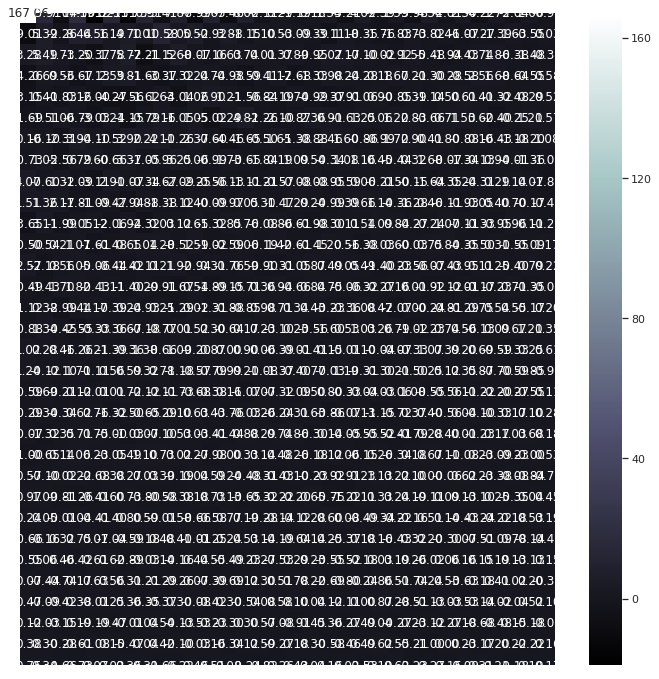

In [94]:
plt.figure(figsize=(12,12))
sns.heatmap(dst[:32, :32], annot=True, fmt=".2f", cmap=plt.cm.bone)
plt.axis("off")
plt.show()

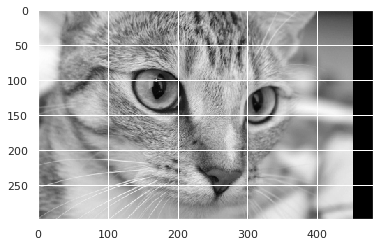

In [95]:
ret = cv2.idct(dst)
plt.imshow(ret,cmap='gray')

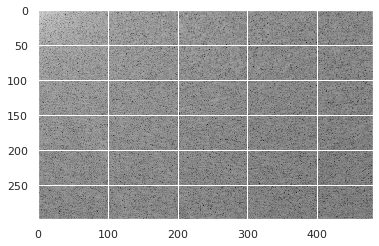

In [96]:
plt.imshow(np.log10(abs(dst)),cmap='gray')

In [97]:
ret = ret*255.

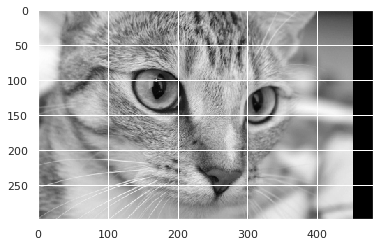

In [98]:
plt.imshow(ret,cmap='gray')

In [99]:
np.max(ret[:,:451]-cat)

0.00012588501

In [100]:
test = np.array([
    [40,24,15,19,28,24,19,15],
    [38,34,35,35,31,28,27,29],
    [40,47,49,40,33,29,32,43],
    [42,49,50,39,34,30,32,46],
    [40,47,46,35,31,32,35,43],
    [38,43,42,31,27,27,28,33],
    [39,33,25,17,14,15,19,26],
    [26,16,6 ,1 ,-4, 0, 7,18],
         ])

In [101]:
src = test/255.
ret = cv2.dct(src)*255.

In [102]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.2f}".format(x)})

In [103]:
ret

array([[239.00, 31.43, 26.32, -12.54, 2.75, -5.14, 3.44, 0.70],
       [34.68, -2.07, -18.09, 7.02, 3.48, 0.42, -0.58, 1.59],
       [-70.84, 0.98, 7.64, 22.07, 8.71, 5.62, -1.56, -0.64],
       [5.47, 1.19, -5.59, 12.14, -1.81, 0.23, -0.84, 1.37],
       [-17.75, -3.34, 5.62, 5.49, 2.50, -1.05, -0.16, 0.02],
       [2.66, 4.24, 2.32, 2.73, 1.88, -2.13, -0.07, 1.23],
       [-3.13, 0.04, -0.56, -1.21, -1.17, -1.22, -0.14, 0.32],
       [1.37, -0.91, 3.06, 1.04, -0.65, -0.09, -0.72, 0.06]])

In [104]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
def c(N, k, n):
    if (k == 0):
        return 1 / math.sqrt(N)
    else:
        return math.sqrt(2 / N) \
            * math.cos((math.pi * (2 * n + 1) * k) / (2 * N))

In [105]:
def cMatrix(img):
    C = []
    for k in range(img.shape[1]):
        C.append([])
        for n in range(img.shape[0]):
            C[k].append(c(img.shape[1], k, n))
    return np.array(C)

In [106]:
def dct_2d(img):
    C = cMatrix(img)
    U = img
    CT = C.transpose()

    return np.dot(np.dot(C, U), CT)

def idct_2d(img):
    C = cMatrix(img)
    U = img
    CT = C.transpose()

    return np.dot(np.dot(CT, U), C)

In [107]:
C = cMatrix(test)

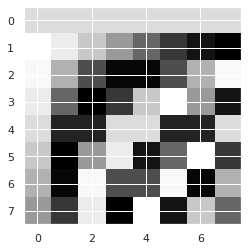

In [108]:
plt.imshow(C,cmap='gray')

In [109]:
CT = C.transpose()

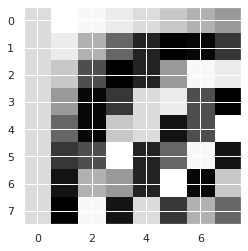

In [110]:
plt.imshow(CT,cmap='gray')

In [111]:
dct = dct_2d(test)

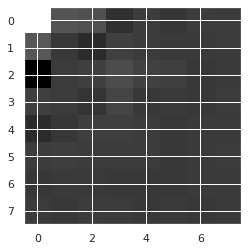

In [112]:
plt.imshow(dct,cmap='gray')

In [113]:
dct

array([[239.00, 31.43, 26.32, -12.54, 2.75, -5.14, 3.44, 0.70],
       [34.68, -2.07, -18.09, 7.02, 3.48, 0.42, -0.58, 1.59],
       [-70.84, 0.98, 7.64, 22.07, 8.71, 5.62, -1.56, -0.64],
       [5.47, 1.19, -5.59, 12.14, -1.81, 0.23, -0.84, 1.37],
       [-17.75, -3.34, 5.62, 5.49, 2.50, -1.05, -0.16, 0.02],
       [2.66, 4.24, 2.32, 2.73, 1.88, -2.13, -0.07, 1.23],
       [-3.13, 0.04, -0.56, -1.21, -1.17, -1.22, -0.14, 0.32],
       [1.37, -0.91, 3.06, 1.04, -0.65, -0.09, -0.72, 0.06]])

In [114]:
dct2 = idct_2d(dct)

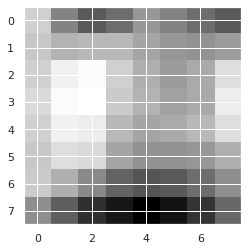

In [115]:
plt.imshow(dct2,cmap='gray')

(-0.5, 7.5, 7.5, -0.5)

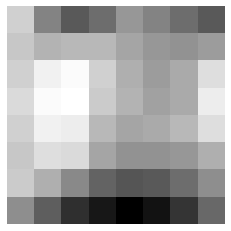

In [122]:
plt.imshow(test,cmap='gray')
plt.axis('off')

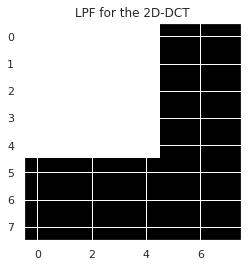

5 5


In [117]:
height,width = test.shape

stop_band = 1./1.5
#For rows:
Mr=np.ones((height,1))
Lr= int(height*stop_band)
Mr[Lr:height,0]=np.zeros( height-Lr)
#For columns:
Mc=np.ones((1,width))
Lc= int(width*stop_band)
Mc[0,Lc:width]=np.zeros(width-Lc);

#Together:
M=np.dot(Mr,Mc)
plt.imshow(M,cmap='gray')
plt.title("LPF for the 2D-DCT")
plt.show()
print(Lr,Lc)

array([[1.44, 0.30, 0.41, -1.11, 0.82, -0.99, 0.34, -0.43],
       [-1.71, -2.18, 0.93, 1.19, -0.33, 0.73, 0.46, 0.23],
       [-0.39, 1.10, 0.24, -2.91, 0.33, 0.64, -1.95, 1.21],
       [1.10, 1.98, 1.07, -2.07, 3.22, 1.12, -4.58, 1.09],
       [-1.94, 0.70, 0.21, -2.57, 0.94, 1.58, -1.02, 2.57],
       [-2.74, -0.36, 1.00, -1.58, 0.67, -0.17, -3.04, -0.21],
       [4.30, 1.67, 0.02, -0.55, 1.23, 1.31, -0.39, 1.26],
       [-2.05, -1.12, 0.03, 0.72, -1.71, 0.87, -0.90, -0.01]])

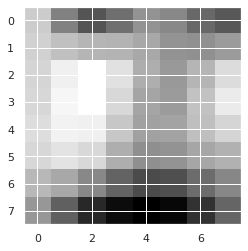

In [118]:
dct_lp = M*dct
dct3 = idct_2d(dct_lp)
plt.imshow(dct3,cmap='gray')
test-dct3

4.400485041509799e-14

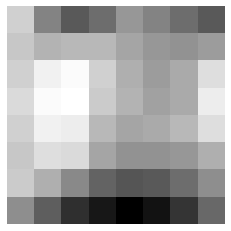

In [125]:
dct2 = idct_2d(dct)
plt.imshow(dct2,cmap='gray')
plt.axis('off')

mae = np.mean(np.abs(dct2-test))